In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号

In [2]:
df = pd.read_csv('Temp.csv')
df.head(10)

,职位,公司,工作地点,福利,学历,经验年数,招聘人数,最低工资,最高工资,福利值
0,ERP实施,金蝶软件合肥分公司,合肥,"绩效奖金,定期体检,员工旅游,年终奖金,弹性工作,专业培训",本科,0.0,5,0.40,0.60,176
1,数据仓库工程师,土巴兔装修网,深圳,"五险一金,员工旅游,交通补贴,绩效奖金,股票期权,弹性工作,定期体检,专业培训",无学历要求,0.0,1,1.50,3.00,268
2,软件测试工程师,证通股份有限公司,上海,"做五休二,补充公积金,补充医疗保险,节日福利,免费班车,餐饮补贴",本科,0.0,2,1.50,3.00,166
3,C#.NET开发工程师,武汉微诚科技股份有限公司西安研发中心,西安,"保险,交通补贴,餐饮补贴,绩效奖金,年终奖金,专业培训",本科,6.0,5,0.60,1.50,191
4,C++研发工程师,北京凯罗斯软件科技有限公司,北京,无,本科,0.0,2,1.00,1.50,0
5,PHP开发工程师,上海菜花文化传媒有限公司,上海,无,大专,6.0,1,2.00,2.50,0
6,产品运营,健客网,东莞,"五险一金,员工旅游,绩效奖金,提供住宿,房屋补贴",本科,1.0,2,0.30,0.50,205
7,C#.NET开发工程师,昆明新奇星科技有限公司,昆明,"五险一金,员工旅游,年终奖金,定期体检,专业培训,餐饮补贴",大专,1.0,3,0.35,0.45,221
8,软件测试工程师,睿思商业智能（深圳）有限公司,深圳,"做五休二,周末双休,带薪年假,五险一金,免费班车,节日福利,交通补贴,餐饮补贴,加班补贴,通讯补贴",大专,0.0,6,0.50,0.80,360
9,区块链工程师,广州畅游互动信息技术有限公司,广州,"带薪年假,节日福利,专业培训",本科,0.0,1,2.50,3.50,83


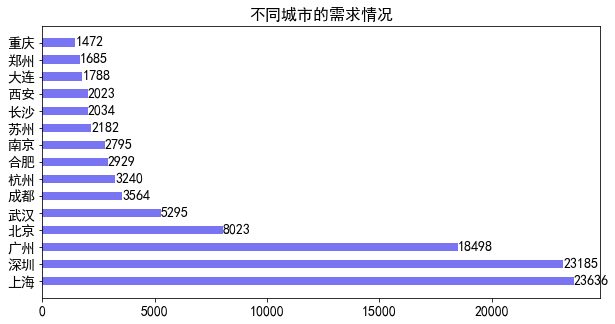

In [3]:
#1.分析不同城市的人才需求情况
df1 = df.drop(df[df.工作地点=='异地招聘'].index)
city_need = df1.groupby(by='工作地点')['招聘人数'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,5))
y = np.arange(15)
plt.barh(y,city_need.head(15),0.5,color='#7874f2')
plt.yticks(np.arange(15),city_need.head(15).index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同城市的需求情况',fontsize=16)
for a,b in zip(city_need.head(15),y):
    plt.text(a+1,b-0.2,a,fontsize=14)
plt.show()

加载图片成功！
开始加载文本


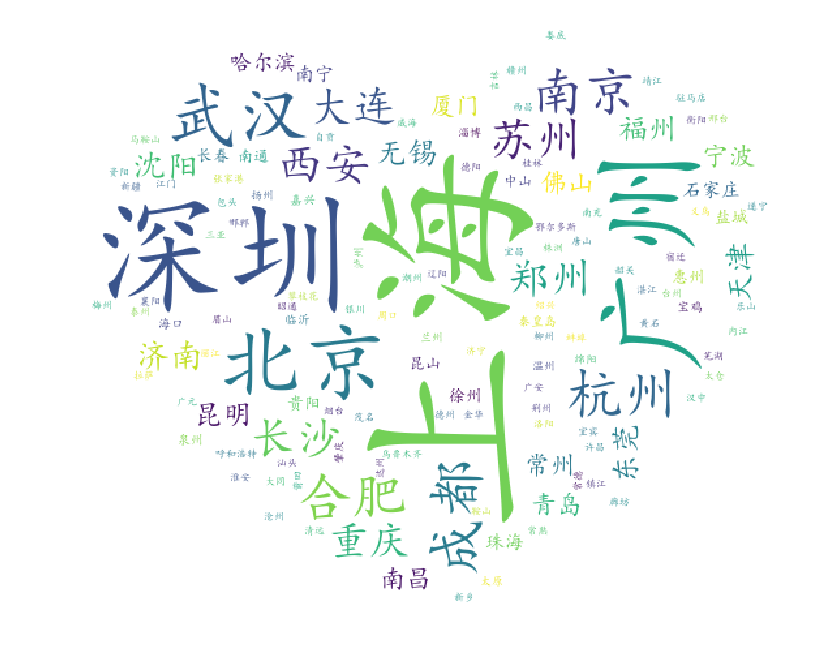

In [4]:
#创建词云
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#将dataframe转成字典
cloud_dict = dict(city_need)

backgroud_Image = plt.imread('heart.jpg')
print('加载图片成功！')
#print(backgroud_Image)
'''设置词云样式'''
wc = WordCloud(
    background_color='white',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path='C:\Windows\Fonts\simkai.ttf',  # 若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
    max_words=2000, # 设置最大现实的字数
    stopwords=STOPWORDS,# 设置停用词
    max_font_size=150,# 设置字体最大值
    min_font_size=8,
    random_state=20# 设置有多少种随机生成状态，即有多少种配色方案
)
wc.fit_words(cloud_dict)
print('开始加载文本')
#改变字体颜色
img_colors = ImageColorGenerator(backgroud_Image)
#字体颜色为背景图片的颜色
#wc.recolor(color_func=img_colors)
# 显示词云图
plt.figure(figsize=(14,12))
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.axis('off')
plt.show()
wc.to_file('city_need_cloud.png')

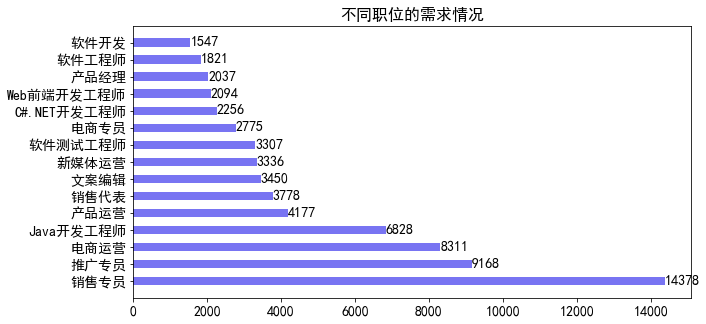

In [5]:
#2.分析不同岗位的人才需求情况
job_need = df.groupby(by='职位')['招聘人数'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,5))
y = np.arange(15)
plt.barh(y,job_need.head(15),0.5,color='#7874f2')
plt.yticks(np.arange(15),job_need.head(15).index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同职位的需求情况',fontsize=16)
for a,b in zip(job_need.head(15),y):
    plt.text(a+0.2,b-0.2,a,fontsize=14)
#plt.show()

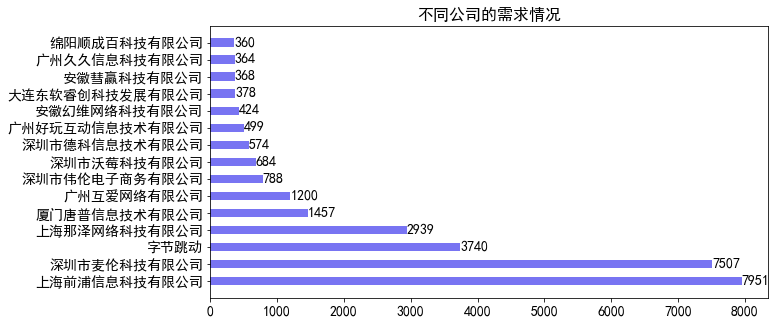

In [6]:
#3.分析不同公司的人才需求情况
comp_need = df.groupby(by='公司')['招聘人数'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,5))
y = np.arange(15)
plt.barh(y,comp_need.head(15),0.5,color='#7874f2')
plt.yticks(np.arange(15),comp_need.head(15).index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同公司的需求情况',fontsize=16)
for a,b in zip(comp_need.head(15),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
#plt.show()

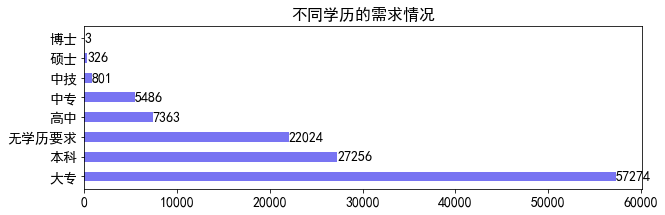

In [7]:
#4.不同学历要求的需求情况
degree_need = df.groupby(by='学历')['招聘人数'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,3))
y = np.arange(8)
plt.barh(y,degree_need,0.5,color='#7874f2')
plt.yticks(np.arange(8),degree_need.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同学历的需求情况',fontsize=16)
for a,b in zip(degree_need.head(15),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()

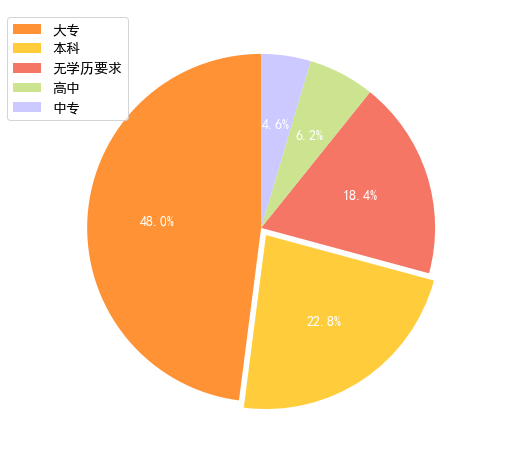

In [8]:
plt.figure(figsize=(10,8))
explode = (0,0.05,0,0,0)
colors = ['#ff9234','#ffcd3c','#f57665','#cce490','#cbc9ff']
font_prop = font_prop = {'fontsize':14,'color':'w'}
plt.pie(degree_need.head(5).values,explode=explode,labels=degree_need.head(5).index,\
        autopct='%1.1f%%',shadow=False,startangle=90,\
       colors=colors,textprops=font_prop)
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1),fontsize=14)
plt.show()

In [9]:
df.经验年数.value_counts()

0.0     12745
3.5      6333
1.0      5772
2.0      5576
6.0      2144
8.5       168
10.0       67
Name: 经验年数, dtype: int64

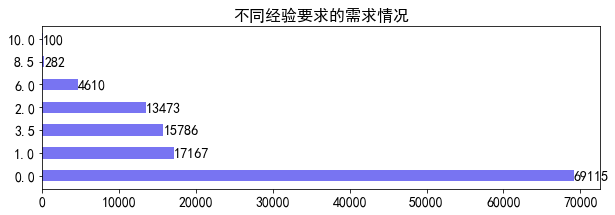

In [10]:
# 5.不同经验要求的需求情况
ex_need = df.groupby(by='经验年数')['招聘人数'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,3))
y = np.arange(7)
plt.barh(y,ex_need,0.5,color='#7874f2')
plt.yticks(np.arange(7),ex_need.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同经验要求的需求情况',fontsize=16)
for a,b in zip(ex_need.head(15),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()